In [141]:
import pandas as pd
import seaborn as sns
from calendar import month_name
%run Untitled22.ipynb
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


loading the rainfall dataset and transforming it


In [191]:
rain = pd.read_csv('Documents/python code unibo/data/rain_data.csv', index_col='Unnamed: 0')
rain.head()

#creating avariable which will return the precipitation in mm

rain['precipitation in mm'] = rain[0:-1].sum(axis=1)
# Converting the datatframe into time series
rain.index = pd.to_datetime(rain.index)

#converting into monthly time serie
cols = [-1]
rain2 = rain[rain.columns[cols]]
rain_montly =rain2.resample('M').mean()
months = [month_name[i] for i in range(3,13)]
rain_montly['months'] = months
rain_montly = rain_montly.drop(rain_montly.index[-1])

# The precipitation graph

<AxesSubplot:xlabel='months', ylabel='precipitation in mm'>

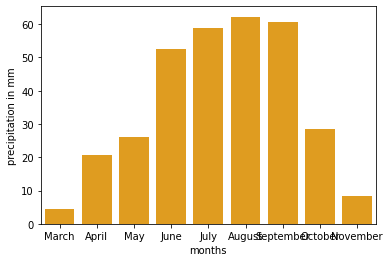

In [231]:
# Create the bar plot
sns.barplot(x='months', y='precipitation in mm', data=rain_montly, color= "orange")


# tranformming the tweets dataset

In [193]:
# importing the dataset
df = pd.read_csv('Documents/data/tweet_df_class.csv', index_col='Datetime').drop('Unnamed: 0', axis=1)
tweets_text = df.original_text
prep_tweets = tweets_text.apply(pre_processing)

In [225]:
#converting the dataframe into a time series with only variables class and daytime 
cols = [1]
df2 = df[df.columns[cols]]


# Converting the datatframe into time series
df2.index = pd.to_datetime(df2.index)

monthly_ts = df2.resample('M').sum()
months = [month_name[i] for i in range(3,12)]
monthly_ts['months'] = months
monthly_ts = monthly_ts.rename(columns={"class": "malaria instances"})


# graph for the tweets

[Text(0.5, 0, 'months'),
 Text(0, 0.5, 'malaria instances'),
 Text(0.5, 1.0, 'malaria instances by months ')]

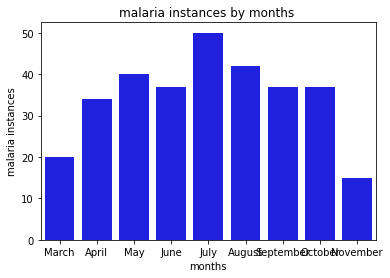

In [234]:
# the graph for the tweets
ax = sns.barplot(x='months', y='malaria instances', data=monthly_ts, color= "blue")
ax.set(xlabel='months', ylabel='malaria instances', title = "malaria instances by months ")

In [227]:

full1 = pd.melt(full, id_vars = "months")
full1

,months,variable,value
0,March,malaria instances,20.000000
1,April,malaria instances,34.000000
2,May,malaria instances,40.000000
3,June,malaria instances,37.000000
4,July,malaria instances,50.000000
5,August,malaria instances,42.000000
6,September,malaria instances,37.000000
7,October,malaria instances,37.000000
8,November,malaria instances,15.000000
9,March,precipitation in mm,4.317647


# The line graph

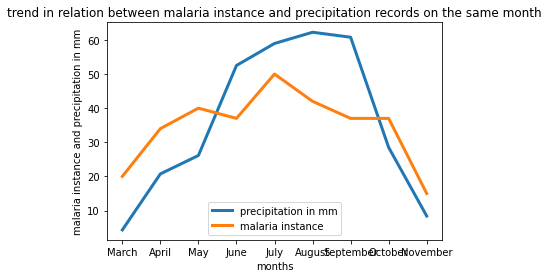

In [238]:
fig, axs = plt.subplots(ncols=1)
sns.lineplot(x='months', y='precipitation in mm', data=rain_montly,lw=3)
b = sns.lineplot(x='months', y='malaria instances', data=monthly_ts, lw=3)
b.set(xlabel='months', ylabel='malaria instance and precipitation in mm', title = "trend in relation between malaria instance and precipitation records on the same month")
plt.legend(labels=['precipitation in mm','malaria instance'], facecolor='white')

C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


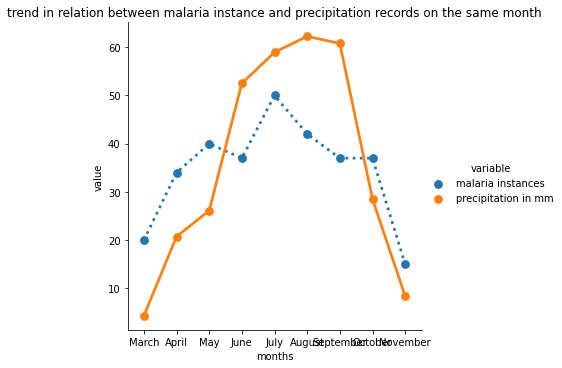

In [239]:
e = sns.factorplot(x = 'months', y='value', 
               hue = 'variable',data=full1, linestyles=[":", "-"])
e.set(title = "trend in relation between malaria instance and precipitation records on the same month")
plt.show()

# The bar graph

C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


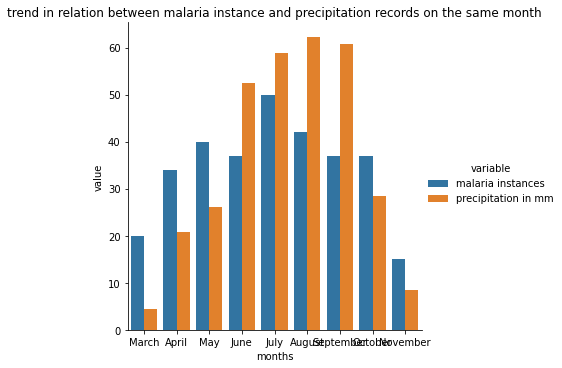

In [240]:
t =sns.factorplot(x = 'months', y='value', 
               hue = 'variable',data=full1, kind='bar')
t.set(title = "trend in relation between malaria instance and precipitation records on the same month")
plt.show()